# Machine Learning Example (with **tablet.cs** dataset)

Utku GEZENSOY          190601058
Ramazan Arda AŞCI      190601077

# Özet

Teknolojik ürünler satan mağazaya ait tablet ürünlerinin özellikleri ve fiyatları “**tablet.csv**” olarak sizlerle paylaşılmıştır. 

Mağaza müdürü vitrinlerinde tablet ürünlerini en doğru şekilde sergileyebilmek için 2.000 adet tableti fiyat/performans durumlarına göre “Ucuz”, “Normal”, “Pahalı”, “Çok Ucuz” olarak etiketlemiştir. 

*Buradan hedef değişkenimizin "fiyat aralığı" olduğunu anlayabiliyoruz.*

Mağazasına yeni gelecek tablet ürünlerini etiketleyerek vakit kaybetmek istemeyen IT ekibi mevcut verilerle başarılı bir makine öğrenmesi algoritması geliştirmek istemektedir. *Böylelikle yeni gelecek tablet ürünlerini hangi vitrinde sergilemeleri gerektiğini hızlı ve güvenilir şekilde elde edebileceklerdir.*


# Uygulama

İlk olarak kullanacağımız kütüphaneleri yükleyelim.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing   # Ön işleme için, label encoding vb. içerikleri dahil etmek için kullanırız.
import matplotlib.pyplot as plt
import missingno                    # Eksik verileri daha iyi anlamlandırabilmek için kullanırız.
import re                           # Düzenli ifadeler kullanmak için dahil ettiğimiz kütüphanemizdir.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, auc, roc_curve, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import *
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import ensemble
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import export_graphviz, export_text, export_graphviz


Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım.

In [2]:
df = pd.read_csv("../input/tabletcsv/tablet.csv")

# Veri Setimizi Tanıyalım

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [3]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [4]:
df.shape

(2000, 20)

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

In [6]:
df.describe().T
#describe fonksiyonu sayesinde verilerin daha anlamlı hale geldiğini görüyoruz. Yorumlama yolu açılıyor.
#Ram değerlerindeki standart sapma en fazladır. 
#Varvanys: Standart sapmanın karesi ve birimsiz halidir. Dolayısıyla Ram değerleri en büyük varyansa sahiptir.
#Farklı dünyadan verilerin ne kadar yayvan olduğunu karşılaştıracaksak varyans değerine ihtiyaç duyarız.

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


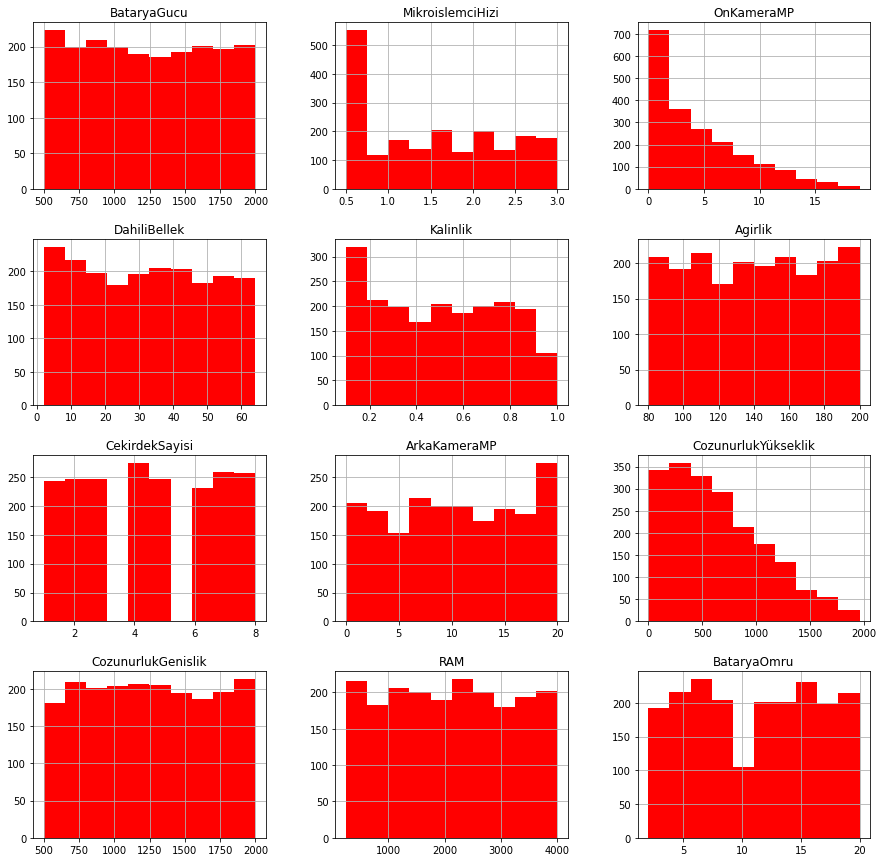

In [7]:
df.hist(figsize =(15,15), color = "red")
plt.show()

Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [8]:
df.isna().sum()
#OnKameraMP'de 5
#RAM'de 12 eksik değer var

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. 
Korelasyon katsayıları hakkında fikir yürütelim.
En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [9]:
df.corr()
#İki veya daha fazla değişken arasındaki ilişkinin varlığı, bu ilişkinin yönü ve şiddeti korelasyon analizi ile belirlenir.
#Korelasyon katsayısı  -1 < r < 1  aralığında değer alır.

#r = -1       (ters yönlü mükemmel ilişki)
#r = 0        (ilişki yok.)
#r = 1        (aynı yönlü mükemmel ilişki)
#r = 0.7      (aynı yönlü iyi ilişki)
#r = - 0.3    (ters yönlü orta derece ilişki) 

#Verilere göre en güçlü pozitif ilişki OnKameraMP ve ArkaKameraMP arasındadır. (0.645697)
#Fazla güçlü bir ilişki olduğu söylenemez.

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

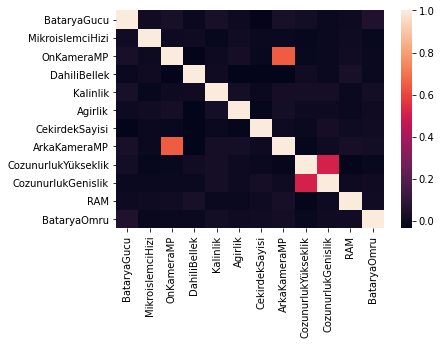

In [10]:
corr = df.corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values);
#Isı haritasını incelediğimizde korelasyonun düşük olduğunu dolayısıyla aralarındaki ilişkinin çok zayıf olduğunu görüyoruz.

Veri çerçevemizin hedef değişkeninin benzersiz değerlerini görüntüleyelim.

In [11]:
df["FiyatAraligi"].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

Veri çerçevemizin hedef değişkeninin benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [12]:
df["FiyatAraligi"].nunique()

4

Hedef değişkenimizin "fiyat aralığı" olduğunu anlamıştık. Değişkenin dengeli dağılıp dağılmadığını inceleyelim.



In [13]:
df.groupby(["FiyatAraligi"]).std()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
FiyatAraligi,,,,,,,,,,,,
Normal,452.863065,0.804404,4.347390,18.441958,0.286215,34.320326,2.262546,5.952861,445.789232,427.757151,496.211735,5.433070
Pahalı,414.992261,0.796450,4.332399,17.930377,0.291901,34.911994,2.297074,6.085521,483.720179,426.823571,390.975480,5.443129
Ucuz,438.614528,0.814479,4.499432,18.000739,0.286895,35.678956,2.311684,6.124806,441.351209,433.564352,465.850159,5.570729
Çok Ucuz,410.801305,0.848941,4.185411,18.101023,0.288184,36.378319,2.268544,6.095805,372.824164,413.001780,362.755397,5.397009


In [14]:
df["FiyatAraligi"].value_counts() #Her benzersiz değişkenden 500 adet olması dağılımın düzenli olduğunu gösterir.

Çok Ucuz    500
Pahalı      500
Normal      500
Ucuz        500
Name: FiyatAraligi, dtype: int64

Bunu grafikte de görelim.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

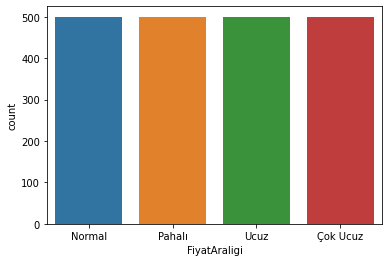

In [15]:
sns.countplot(df["FiyatAraligi"])

# Sayısal ve kategorik değişkenleri ideal tekniklerle ve araçlarla görselleştirelim ve birkaç örnek üzerinden yorumlama gerçekleştirelim.

İlk olarak bazı değişkenlerin aralarındaki ilişkileri inceleyelim.

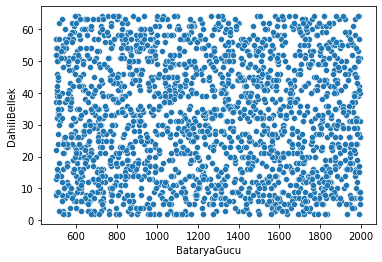

In [16]:
sns.scatterplot(x= "BataryaGucu" , y="DahiliBellek" , data=df);
#BataryaGucu ve DahiliBellek arasında herhangi bir ilişki bulunmamaktadır.

Bunu doğrulamak için iki değişken arasındaki korelasyon katsayısını yazdıralım.

In [17]:
df.corr()["BataryaGucu"]["DahiliBellek"]

-0.004003679910891359

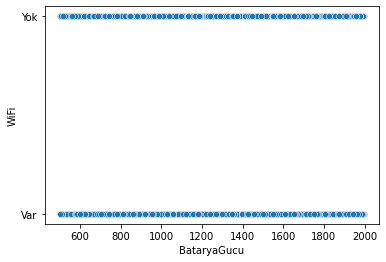

In [18]:
sns.scatterplot(x= "BataryaGucu" , y="WiFi" , data=df);
#Aynı şekilde BataryaGucu ile WiFi arasında yine bir ilişki bulunmamaktaadır.

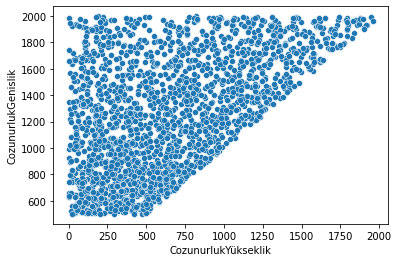

In [19]:
sns.scatterplot(x = "CozunurlukYükseklik", y = "CozunurlukGenislik", data = df);
#CozunurlukGenislik ve CozunurlukYükseklik arasında bir ilişki bulunmkatadır.

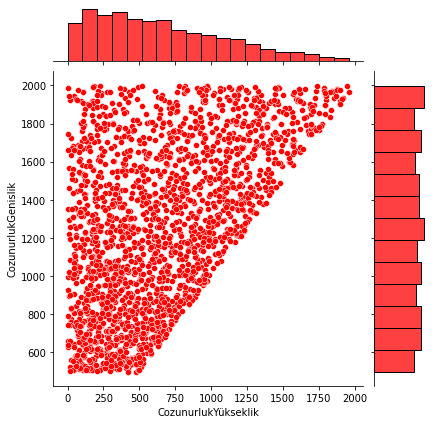

In [20]:
sns.jointplot(x = "CozunurlukYükseklik", y = "CozunurlukGenislik", data = df, color="red");

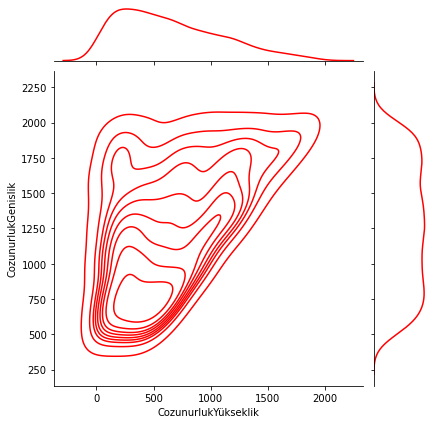

In [21]:
sns.jointplot(x = df["CozunurlukYükseklik"], y = df["CozunurlukGenislik"], kind = "kde", color = "red");

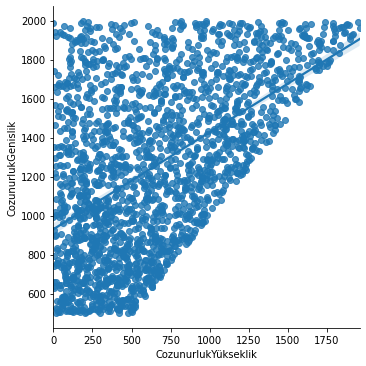

In [22]:
sns.lmplot(x = "CozunurlukYükseklik", y = "CozunurlukGenislik", data = df);
#CozunurlukYükseklik ile CozunurlukYükseklik arasında doğrusal bir ilişki var.

Bu ilişnin gücünü iki değişken arasındaki korelasyon katsayısını yazdıralım.

In [23]:
df.corr()["CozunurlukYükseklik"]["CozunurlukGenislik"]
#Fazla güçlü bir ilişki değilmiş

0.5106644191393149

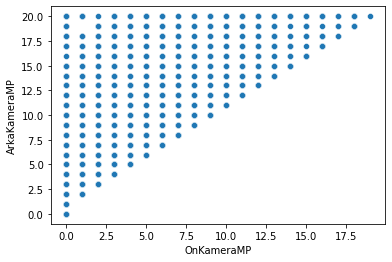

In [24]:
sns.scatterplot(x = "OnKameraMP", y = "ArkaKameraMP", data = df);

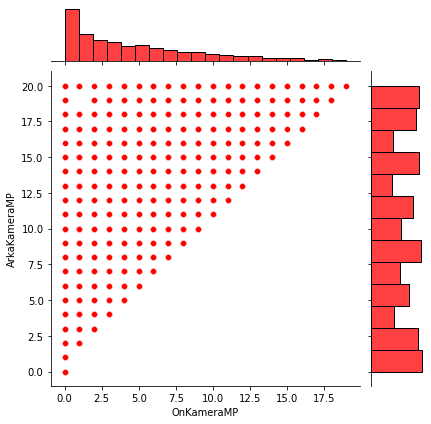

In [25]:
sns.jointplot(x = "OnKameraMP", y = "ArkaKameraMP", data = df, color="red");

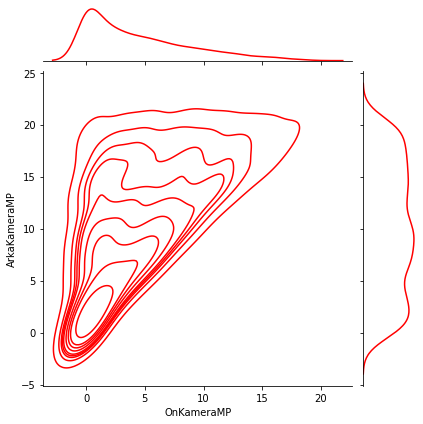

In [26]:
sns.jointplot(x = df["OnKameraMP"], y = df["ArkaKameraMP"], kind = "kde", color = "red");

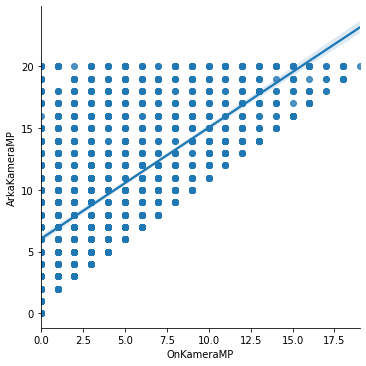

In [27]:
sns.lmplot(x = "OnKameraMP", y = "ArkaKameraMP", data = df);
#CozunurlukYükseklik ile CozunurlukYükseklik arasında doğrusal ve güçlü bir ilişki var.

İki değişken arasındakikorelasyon katsayısını yazdıralım.

In [28]:
df.corr()["OnKameraMP"]["ArkaKameraMP"]

0.6456968663318242

Keman grafiği çizdirerek bazı değişkenlerin dağılımını inceleyelim.

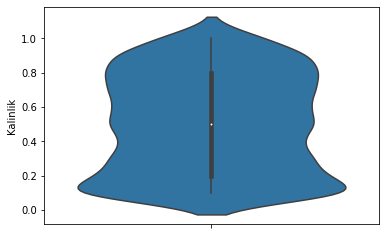

In [29]:
sns.violinplot(y = "Kalinlik", data = df);

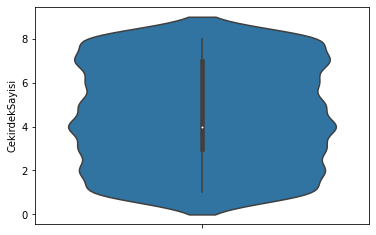

In [30]:
sns.violinplot(y = "CekirdekSayisi", data = df);

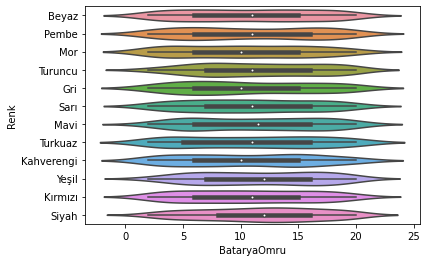

In [31]:
sns.violinplot(x= "BataryaOmru" , y="Renk" , data=df); #Batarya ömrü ile renk arasında bir ilişki bulunmamaktadır.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FiyatAraligi', ylabel='RAM'>

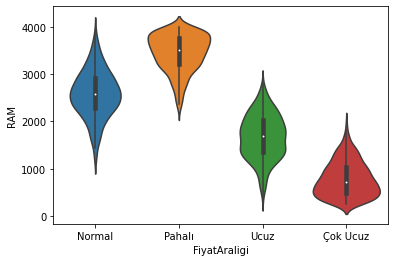

In [32]:
sns.violinplot(df["FiyatAraligi"],df["RAM"])
#Burada pahalı tabletlerin RAM değerlerinin daha yüksek olduğunu görebiliriz.
#Çok ucuza doğru bu değer azalıyor.

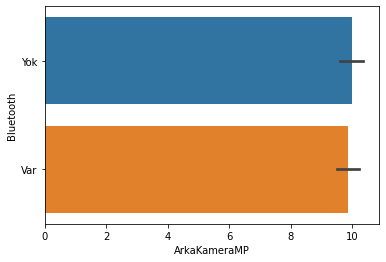

In [33]:
sns.barplot(x ="ArkaKameraMP" , y = "Bluetooth" , data = df);

 # Eksik verileri Tespit Etme ve Mantıklı Şekilde Doldurma İşlemleri

Öncelikle hangi verimizde kaç adet eksik değer olduğunu tekrar görünteleyelim.

In [34]:
df.isnull().sum()
#OnKameraMP'de 5
#RAM'de 12

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

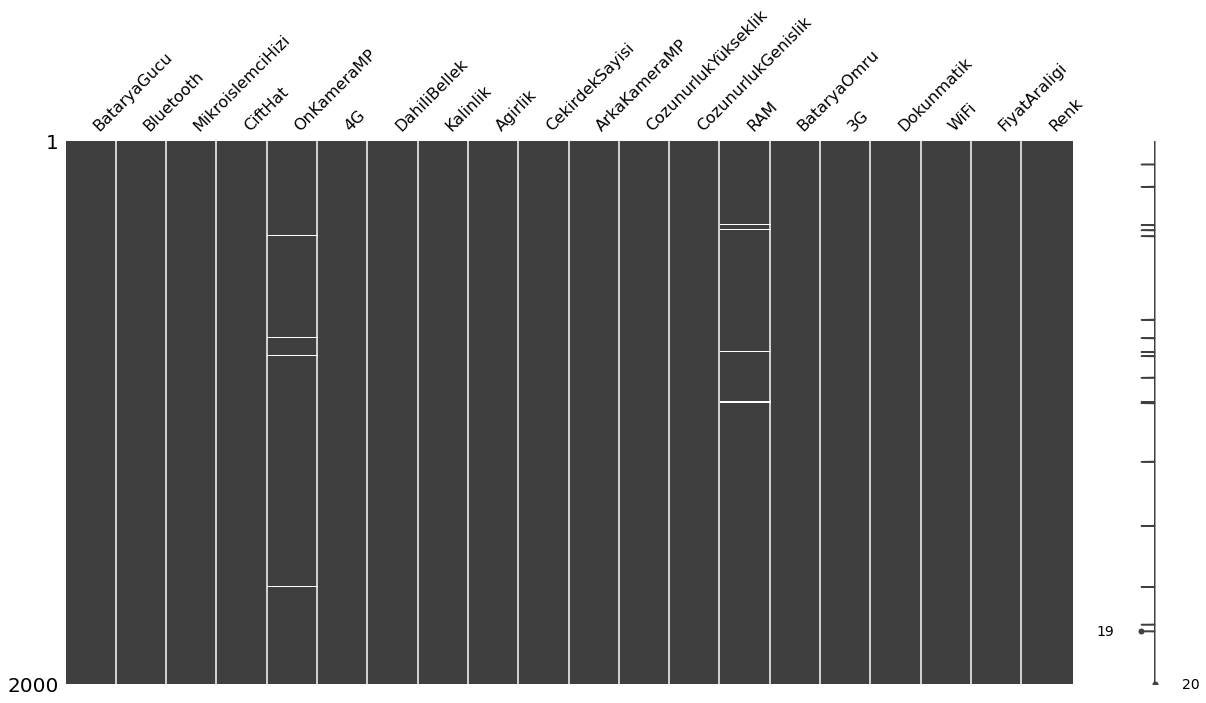

In [35]:
missingno.matrix(df,figsize=(20, 10));
#Veristeimizde çok fazla eksik değer bulunmamaktadır.

Eksik verilerle baş etmenin ilk yöntemi görmezden gelmektir. Fakat çok fazla eksik veri varsa veya özellikle bu istenmiyorsa kullanılmaz. Eksik verileri direkt olarak yok etmek için *dropna()* fonksiyonu kullanılır.

Eksik değerler arasında ilişki olup olmadığını inceleyelim

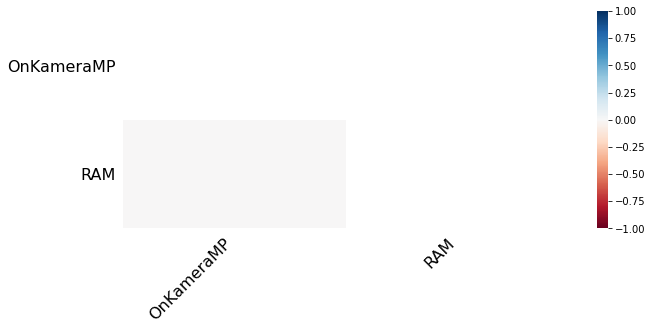

In [36]:
missingno.heatmap(df, figsize= (10,4));
#OnKameraMP ve RAM değişkenleri aynı gözlemde eksik veri barındırmadığından aralarında ilişki bulunmamaktadır.

Öncelikle OnKameraMP değişkenimizi inceleyim

In [37]:
df["OnKameraMP"].unique()
#eksik verilerin nan olarak tanımlandığını görüyoruz.

array([ 2.,  0.,  1., 12.,  9., 10.,  4.,  7., 13., 11.,  5.,  3.,  6.,
        8., 14., 16., 18., 15., nan, 19., 17.])

In [38]:
df[df["OnKameraMP"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


Eksik verilerin diğer verilerle ilişkisi olup olmadığı hakkında fikir yürütelim.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CiftHat', ylabel='count'>

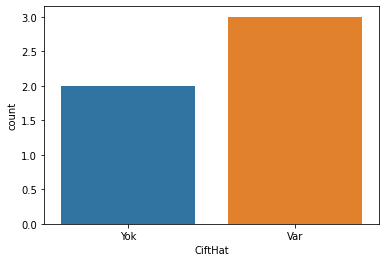

In [39]:
sns.countplot(df[df["OnKameraMP"].isnull()]["CiftHat"])
#pek bir ilişki yok gibi gözüküyor

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ArkaKameraMP', ylabel='count'>

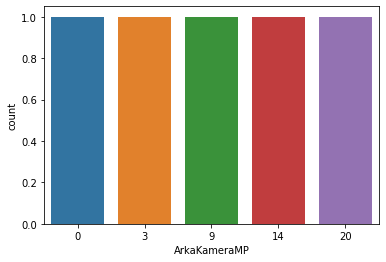

In [40]:
sns.countplot(df[df["OnKameraMP"].isnull()]["ArkaKameraMP"])
#bu değişkenle de ilgisi yok

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

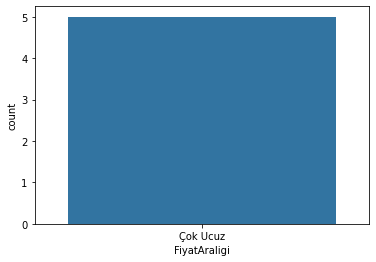

In [41]:
sns.countplot(df[df["OnKameraMP"].isnull()]["FiyatAraligi"])
#Tüm eksik veriler çok ucuz fiyat aralığında. Hedef değişkenle ilişkisi olabilir.
#Çok ucuz fiyatlarda ön kamera bulunmayabilir veya çok ucuz fiyatlarda ön kamera değeri eksik kalmış olabilir.

OnKameraMP değişkeninin eksik verilerini anlamlı verilerle dolduralım.

Bu tür büyük ve spesifik bir veri setinde el ile doldurmak veya global bir değişkenle doldurmak da anlamsız olacaktır. Bu yüzden verilerimizi ortalamaya göre doldurabiliriz.

In [42]:
df.groupby("FiyatAraligi")[["OnKameraMP"]].mean()
#Eksik değişkenimizin hedef değişkene göre ortalamsını alıyoruz.
#Eksik verilerin bulunduğu "Çok Ucuz" kategorisinin ortalaması 4.092929

,OnKameraMP
FiyatAraligi,
Normal,4.498000
Pahalı,4.316000
Ucuz,4.340000
Çok Ucuz,4.092929


In [43]:
df[(df["FiyatAraligi"] == "Çok Ucuz") & (df["OnKameraMP"].isnull())]
#Burada tekrar boş verileri hedef değişkenin spesifik özelliğine göre görüntüledik.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


In [44]:
OnKameraMP_eksik = df[(df["FiyatAraligi"] == "Çok Ucuz") & (df["OnKameraMP"].isnull())].index
OnKameraMP_eksik
#OnKameraMP_eksik değikenini oluşturduk ve boş veri içeren indexleri hedef değişkene göre görüntüledik.

Int64Index([351, 726, 792, 1416, 1641], dtype='int64')

In [45]:
df.loc[OnKameraMP_eksik ,"OnKameraMP"] = 4 # OnKameraMP değişkenimizi çok ucuz kategorisinin ortalaması olan 4 ile dolduruyoruz.

In [46]:
df.isna().sum()["OnKameraMP"]

0

In [47]:
df["OnKameraMP"].unique()

array([ 2.,  0.,  1., 12.,  9., 10.,  4.,  7., 13., 11.,  5.,  3.,  6.,
        8., 14., 16., 18., 15., 19., 17.])

Şimdi RAM değerimizi inceleyelim.

In [48]:
df["RAM"].unique()

array([2328., 3863., 1734., ..., 3557., 3653., 2273.])

In [49]:
df[df["RAM"].isnull()]
#Eksik verilerin NaN olarak tanımlandığını görüyoruz.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı,Sarı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı,Kahverengi
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı,Turuncu


Eksik verilerin diğer verilerle ilişkisi olup olmadığı hakkında fikir yürütelim.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


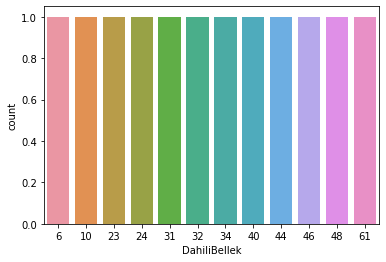

In [50]:
sns.countplot(df[df["RAM"].isnull()]["DahiliBellek"]);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


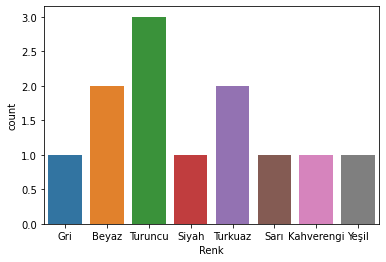

In [51]:
sns.countplot(df[df["RAM"].isnull()]["Renk"]);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


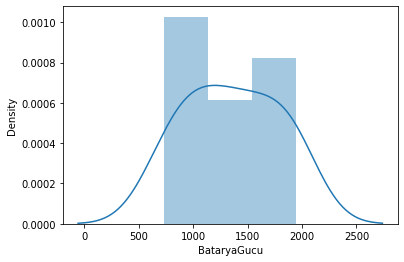

In [52]:
sns.distplot(df[df["RAM"].isnull()]["BataryaGucu"]);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


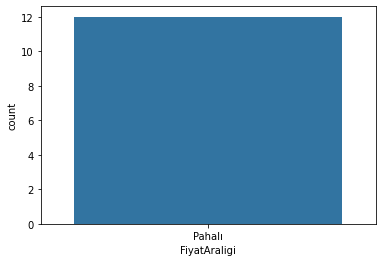

In [53]:
sns.countplot(df[df["RAM"].isnull()]["FiyatAraligi"]); 
#Eksik RAM değerlerinin hepsinin hedef değişkenimiz olan FİyatAraligi'nın bir özelliğinde toplandığını görüyoruz.
#Bütün eksik değerler "Pahali" fiyat aralığında bulunuyor.

RAM değişkenimizin eksik verilerini doldurmaya başlayalım. (Yine ortalamaya göre)


In [54]:
df.groupby("FiyatAraligi")[["RAM"]].mean()
#Eksik verilerin bulunduğu özellikte ortalama değer = 3449.35041

,RAM
FiyatAraligi,
Normal,2582.81600
Pahalı,3449.35041
Ucuz,1679.49000
Çok Ucuz,785.31400


In [55]:
df[(df["FiyatAraligi"] == "Pahalı") & (df["RAM"].isnull())]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı,Sarı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı,Kahverengi
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı,Turuncu


In [56]:
RAM_eksik = df[(df["FiyatAraligi"] == "Pahalı") & (df["RAM"].isnull())].index
RAM_eksik

Int64Index([87, 169, 310, 329, 658, 777, 871, 961, 965, 1180, 1779, 1804], dtype='int64')

In [57]:
df.loc[RAM_eksik ,"RAM"] = 3500
#".loc" yardımıyla ilk parametremizi indisler, ikinci parametremizi ise öznitelik girerek 3500 ile doldurduk.

In [58]:
df.isna().sum()["RAM"]

0

In [59]:
df["RAM"].unique()

array([2328., 3863., 1734., ..., 3557., 3653., 2273.])

In [60]:
df.isna().sum()
#Verisetimizde eksik değer kalmadı.

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

# Kategorik Değişkenleri Sayısallaştırma İşlemleri

> Sayısallaştırma İşlemleri ile
Değişkenleri bilgisayar diline (1 ve 0) çevireceğiz.

In [61]:
label_encoder = preprocessing.LabelEncoder()
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [62]:
df['Bluetooth'] = label_encoder.fit_transform(df['Bluetooth']) 
df.head()
#1 = Bluetooth yok
#0 = Bluetooth var

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [63]:
df['CiftHat'] = label_encoder.fit_transform(df['CiftHat'])
df.head()
#1 = CiftHat yok
#0 = CiftHat var

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [64]:
df['WiFi'] = label_encoder.fit_transform(df['WiFi'])
df.head()
#1 = WiFi yok
#0 = WiFi var

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,0,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,0,Normal,Beyaz


In [65]:
df['3G'] = label_encoder.fit_transform(df['3G']) 
df.head()
#1 = 3G yok
#0 = 3G var

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,0,Yok,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,0,Var,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,1,Yok,0,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,0,Yok,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,0,Var,0,Normal,Beyaz


In [66]:
df['4G'] = label_encoder.fit_transform(df['4G']) 
df.head()
#1 = 4G yok
#0 = 4G var

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,Yok,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,Var,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,Yok,0,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,Yok,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,Var,0,Normal,Beyaz


In [67]:
df['Dokunmatik'] = label_encoder.fit_transform(df['Dokunmatik'])
df.head()
#1 = Dokunmatik yok
#0 = Dokunmatik var

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,Normal,Beyaz


In [68]:
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [69]:
df['Renk'] = pd.Categorical(df['Renk'])
dfDummies = pd.get_dummies(df['Renk'], prefix = 'Renk')
dfDummies
#Değişken hangi renkse orada 1 yazacak.

,Renk_Beyaz,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0,0,0
1996,0,0,0,0,0,0,0,1,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,1,0
1998,0,0,0,0,0,0,0,0,0,1,0,0


In [70]:
df = pd.concat([df, dfDummies], axis=1)
df.head()
#Burada da ana tablomuzla birleştirdik.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df.drop(["Bluetooth","CiftHat","4G","3G" ,"WiFi" ,"Renk" ,"Dokunmatik"], axis = 1, inplace = True) 
#sayısal olmayan değişkenleri drop fonk. ile kaldırdık.

#axis=0 satırlarda işlem yapılır
#axis=1 sütunlarda işlem yapılır

# Makine Öğrenmesi Modellemeleri 

> Makine öğrenmesi modellemeleri yapabilmek için hedef değişkenimiz olan “FiyatAraligi” değişkeni ve bu değişkeni tahmin etmemize yardımcı olacak diğer değişkenleri bağımlı ve bağımsız değişkenler olmak üzere ikiye ayırıyoruz.

* X = Bağımsız değişkenler
* Y = Bağımlı değişkenler

In [72]:
X = df.drop("FiyatAraligi", axis = 1)
Y = df["FiyatAraligi"]

In [73]:
X

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1.9,2.0,50,0.1,146,1,10,499,695,...,0,0,0,0,0,0,0,0,0,0
1,1046,2.8,0.0,58,0.2,100,8,0,259,1040,...,0,0,0,0,1,0,0,0,0,0
2,843,1.3,1.0,16,0.9,119,7,4,593,732,...,0,0,0,1,0,0,0,0,0,0
3,894,0.5,1.0,50,0.5,199,3,14,1285,1462,...,0,0,0,0,0,0,0,0,1,0
4,936,1.0,1.0,18,0.2,153,3,18,1330,1686,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,2.9,3.0,7,0.8,147,2,6,487,722,...,0,0,0,0,0,0,1,0,0,0
1996,1654,1.8,1.0,11,0.3,146,7,2,1184,1719,...,0,0,0,0,0,1,0,0,0,0
1997,742,2.2,4.0,56,0.2,190,7,14,577,1359,...,0,0,0,0,0,0,0,0,1,0
1998,704,2.2,4.0,53,0.2,186,6,6,251,1013,...,0,0,0,0,0,0,0,1,0,0


In [74]:
Y

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

> Bağımlı ve bağımsız değişkenleri, %85 oranında eğitim ve %15 oranında test olmak üzere “train_test_split” metodu kullanılarak ayırmamız istenmiş. 

In [75]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)

In [76]:
X_test.head()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
1860,1433,2.3,2.0,5,0.1,129,5,11,420,784,...,0,0,0,0,0,0,0,0,0,0
353,1174,0.9,7.0,30,1.0,147,4,20,744,1244,...,0,0,0,0,0,0,1,0,0,0
1333,999,2.6,11.0,56,1.0,165,4,13,342,1641,...,0,0,0,0,1,0,0,0,0,0
905,972,0.5,5.0,13,0.4,193,5,8,1392,1795,...,0,0,0,0,0,0,0,1,0,0
1289,1811,2.5,4.0,5,0.6,98,4,16,447,568,...,0,0,0,0,0,1,0,0,0,0


In [77]:
Y_test.head()

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
Name: FiyatAraligi, dtype: object

In [78]:
X_train.head()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
581,1454,1.6,6.0,21,0.2,160,4,10,186,1100,...,0,0,0,0,1,0,0,0,0,0
76,1254,1.2,2.0,50,0.7,108,5,6,462,1013,...,0,0,0,0,0,0,0,1,0,0
1916,1762,0.6,3.0,26,0.1,83,6,14,525,704,...,0,0,0,1,0,0,0,0,0,0
1414,1876,1.3,9.0,64,1.0,98,3,19,600,1211,...,0,0,0,0,0,0,0,0,0,1
780,1426,1.6,4.0,12,0.7,174,5,16,1573,1694,...,0,1,0,0,0,0,0,0,0,0


In [79]:
Y_train.head()

581     Çok Ucuz
76        Pahalı
1916      Normal
1414      Pahalı
780         Ucuz
Name: FiyatAraligi, dtype: object

Şimdi GaussianNB modeli yaratarak eğitimi gerçekleştiricez.

In [80]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, Y_train)
gnb_model

GaussianNB()

In [81]:
dir(gnb_model) 
#Modelde yazılabilecek komutların listesi

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'score',
 'set_params',
 'sigma_',
 'theta_',
 'var_smoothing']

In [82]:
gnb_model.predict(X.sample(10))
#X_test'in ilk 10 gözleminin ait olduğu türü tahmin ettirmeye çalıştık.

array(['Pahalı', 'Ucuz', 'Ucuz', 'Çok Ucuz', 'Normal', 'Ucuz', 'Normal',
       'Pahalı', 'Normal', 'Ucuz'], dtype='<U8')

In [83]:
Y_test.sample(10)

552     Çok Ucuz
1766      Pahalı
1103      Normal
1784      Pahalı
111         Ucuz
1691        Ucuz
368       Normal
351     Çok Ucuz
1697      Pahalı
829         Ucuz
Name: FiyatAraligi, dtype: object

In [84]:
Y_pred = gnb_model.predict(X_test)
Y_pred
#Y_pred isimli değişkene X_test gözlemlerinin tahminlerini atıyoruz.

array(['Normal', 'Çok Ucuz', 'Pahalı', 'Ucuz', 'Normal', 'Normal',
       'Pahalı', 'Ucuz', 'Normal', 'Ucuz', 'Ucuz', 'Normal', 'Normal',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Ucuz', 'Ucuz', 'Ucuz', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz',
       'Ucuz', 'Normal', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Ucuz', 'Normal',
       'Normal', 'Ucuz', 'Ucuz', 'Pahalı', 'Pahalı', 'Çok Ucuz',
       'Çok Ucuz', 'Ucuz', 'Pahalı', 'Normal', 'Pahalı', 'Çok Ucuz',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Normal', 'Pahalı',
       'Pahalı', 'Pahalı', 'Normal', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz',
       'Ucuz', 'Normal', 'Pahalı', 'Çok Ucuz', 'Ucuz', 'Normal', 'Normal',
       'Pahalı', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Normal',
       'Ucuz', 'Pahalı', 'Çok Ucuz', 'Ucuz', 'Normal', 'Normal', 'Pahalı',
       'Pahalı', 'Ucuz', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Pahalı',
       'Normal', 'Ucuz', 'Pahalı', 'Normal', 'Çok Ucuz', 'Çok Ucuz',
  

In [85]:
Y_test

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
          ...   
316     Çok Ucuz
45      Çok Ucuz
1719    Çok Ucuz
1831      Pahalı
427         Ucuz
Name: FiyatAraligi, Length: 300, dtype: object

In [86]:
accuracy_score(Y_test, Y_pred)
#Doğruluk skoru

0.7533333333333333

In [87]:
con_matrix = confusion_matrix(Y_test, Y_pred)
print(con_matrix)
#Karmaşıklık matrisi.

[[43 10 18  0]
 [18 52  1  0]
 [11  0 55  5]
 [ 0  0 11 76]]


In [88]:
(con_matrix[0][0] + con_matrix[1][1]) / (con_matrix[0][0] + con_matrix[1][1] + con_matrix[1][0] + con_matrix[0][1])
#Karmaşıklık matrisinin doğruluk skorunu hesaplayalım.

0.7723577235772358

In [89]:
cross_val_score(gnb_model, X_test, Y_test, cv = 10)
#10 kez katlamalı çapraz doğrulama yapalım.

array([0.7       , 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.46666667, 0.56666667, 0.46666667, 0.7       , 0.6       ])

In [90]:
cross_val_score(gnb_model, X_test, Y_test, cv = 10).mean()
#Ortalamasını alalım.

0.6166666666666667

In [91]:
PrecScore = precision_score(Y_test, Y_pred, average='weighted')
PrecScore
# Kesinlik skoru. (Pozitif tahminde bulunduğumuz verilerin gerçekte hangi oranda pozitif olduğunu buluruz.)

0.7650732365825661

In [92]:
RecScore = recall_score(Y_test, Y_pred, average='weighted')
RecScore
#Yakalama skoru. (Gerçekte pozitif olanların ne kadarının doğru tahmin edildiğini ölçer.)

0.7533333333333333

In [93]:
F1Score = f1_score(Y_test, Y_pred, average = 'weighted')  
F1Score
#F1 skoru (Kesinlik ve Yakalama Skorlarının ağırlıklı ortlamasının alınmasıyla elde edilir).

0.7566549532339005

> Modellerin başarısını değerlendirme konusunda F1_Score, Precision, Recall değerleri “classification_report” aracılığıyla yazdırmamız istenmiş.

In [94]:
print(classification_report(Y_test, Y_pred))
#Sınıflandırma raporu.

              precision    recall  f1-score   support

      Normal       0.60      0.61      0.60        71
      Pahalı       0.84      0.73      0.78        71
        Ucuz       0.65      0.77      0.71        71
    Çok Ucuz       0.94      0.87      0.90        87

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.77      0.75      0.76       300



Kesinlik, Yakalama ve F1 skorlarına baktığımız zaman çıkan değerlerin neredeyse aynı olduğunu görüyoruz.

In [95]:
ROC_AUC_Score = roc_auc_score(Y_test, Y_pred)
ROC_AUC_Score
#Hedef değişkenimiz olan "Fiyat Aralığı"nın kategorik bir değişken olmasından ötürü bu işlemi gerçekleştiremiyoruz.
#Sayısal bir değişken olsaydı gerçekleştirebilirdik.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [96]:
len(X.columns)
#Kaç öznitelik olduğuna bakalım (Feature Selection'da bu değeri kullanıcaz)

24

In [97]:
X.columns

Index(['BataryaGucu', 'MikroislemciHizi', 'OnKameraMP', 'DahiliBellek',
       'Kalinlik', 'Agirlik', 'CekirdekSayisi', 'ArkaKameraMP',
       'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru',
       'Renk_Beyaz', 'Renk_Gri', 'Renk_Kahverengi', 'Renk_Kırmızı',
       'Renk_Mavi', 'Renk_Mor', 'Renk_Pembe', 'Renk_Sarı', 'Renk_Siyah',
       'Renk_Turkuaz', 'Renk_Turuncu', 'Renk_Yeşil'],
      dtype='object')

In [98]:
test = SelectKBest(k = 24)
test
#Modelin daha iyi doğruluk skoru vermesi için Feature Selection kullanıcaz.
#KBest tekneiği: Her bir bağımsız değişken için istatistik hesaplandıktan sonra filtreleme yapmamızı sağlar.

SelectKBest(k=24)

Modeli Eğitelim

In [99]:
fit = test.fit(X, Y)
fit
#Test'e parametre olarak bağımlı ve bağımsız değişkenlerimizi girdik.

SelectKBest(k=24)

In [100]:
for i, score in enumerate(fit.scores_):
    print(score, " ==> ", X.columns[i])

31.59815753989697  ==>  BataryaGucu
0.49370780102890643  ==>  MikroislemciHizi
0.7423048791241005  ==>  OnKameraMP
2.9229960794178416  ==>  DahiliBellek
1.5006824396689178  ==>  Kalinlik
3.5943181851549952  ==>  Agirlik
2.6254151540861677  ==>  CekirdekSayisi
0.8254463576889531  ==>  ArkaKameraMP
19.484841776704883  ==>  CozunurlukYükseklik
22.620882490611052  ==>  CozunurlukGenislik
3547.9679261399183  ==>  RAM
1.6288113087357383  ==>  BataryaOmru
0.7985277644423141  ==>  Renk_Beyaz
0.7424648216639064  ==>  Renk_Gri
1.8515556048444797  ==>  Renk_Kahverengi
0.32874764864466033  ==>  Renk_Kırmızı
0.8546411492461239  ==>  Renk_Mavi
0.5900785144514252  ==>  Renk_Mor
0.4845836368050502  ==>  Renk_Pembe
0.2221109441940691  ==>  Renk_Sarı
1.305164828542163  ==>  Renk_Siyah
2.379774003890458  ==>  Renk_Turkuaz
0.5733834743549536  ==>  Renk_Turuncu
2.4523654851009753  ==>  Renk_Yeşil


# Karar Ağacı ve KNN Yapısı

* Karar ağaçları önceden tanımlanmış bir hedef değişkene sahiplerdir. (Burada Fiyat Araligi)
* Yapıları itibariyle en tepeden en aşağı inen bir strateji sunmaktadırlar.
* Karar ağaçlarında en önemli sorunlardan birisi hangi kökten itibaren bölümlemenin veya dallanmanın hangi kritere göre yapılacağıdır. 

In [101]:
#!pip3 install pydotplus
#!pip3 install graphviz
#!pip3 install skompiler
#!pip3 install sklearn

> DecisionTree algoritması varsayılan olarak (criterion = “gini”) parametre değerini kullanıyor ancak bu problem için criterion parametresini (criterion = “entropy”) olacak şekilde değiştirmemiz isteniyor.

In [102]:
cart = DecisionTreeClassifier(random_state = 42, criterion='entropy') 
cart_model = cart.fit(X_train, Y_train)
#Aynı eğitim verileri üzerindne devam ediyorum.
#Entropi kriterinde x ve y parametrelerine bağlı olarak cart_model'i oluşturduk.

Modeli iyileştirmek adına parametreleri optimize ediyoruz.

In [103]:
cart_grid = {"max_depth": range(1,20),
            "min_samples_split" : range(2,100)}
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 1862 candidates, totalling 18620 fits


In [104]:
print("Best parameters: " + str(cart_cv_model.best_params_))
print("Best score: " + str(cart_cv_model.best_score_))

Best parameters: {'max_depth': 9, 'min_samples_split': 3}
Best score: 0.8494117647058825


In [105]:
cart = DecisionTreeClassifier(max_depth = 18, min_samples_split = 3)
cart_tuned = cart.fit(X_train, Y_train)

In [106]:
y_pred = cart_tuned.predict(X_test)
#Modelin bilmedği X_test gözlemlerini tahmin ettirip y_pred'e atadık.

In [107]:
accuracy_score(Y_test, Y_pred)
#Doğruluk skoru.

0.7533333333333333

In [108]:
con_matrix = confusion_matrix(Y_test, Y_pred)
print(con_matrix)
#Karmaşıklık matrisi.

[[43 10 18  0]
 [18 52  1  0]
 [11  0 55  5]
 [ 0  0 11 76]]


In [109]:
cross_val_score(cart_tuned, X_test, Y_test, cv = 15)
#Modele farklı gözlemler verip tekrardan skorunu inceleyelim.

array([0.8 , 0.7 , 0.75, 0.95, 0.85, 0.65, 0.95, 0.95, 0.85, 0.85, 0.8 ,
       0.85, 0.6 , 0.8 , 0.85])

In [110]:
cross_val_score(cart_tuned, X, Y, cv = 15).mean()
#15 skorun ortalaması

0.8320016459058094

In [111]:
print(classification_report(Y_test, Y_pred))
#Sınıflandırma raporu.

              precision    recall  f1-score   support

      Normal       0.60      0.61      0.60        71
      Pahalı       0.84      0.73      0.78        71
        Ucuz       0.65      0.77      0.71        71
    Çok Ucuz       0.94      0.87      0.90        87

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.77      0.75      0.76       300



In [112]:
r = export_text(cart, feature_names = ['BataryaGucu', 'MikroislemciHizi', 'OnKameraMP', 'DahiliBellek',
       'Kalinlik', 'Agirlik', 'CekirdekSayisi', 'ArkaKameraMP',
       'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru',
       'Renk_Beyaz', 'Renk_Gri', 'Renk_Kahverengi', 'Renk_Kırmızı',
       'Renk_Mavi', 'Renk_Mor', 'Renk_Pembe', 'Renk_Sarı', 'Renk_Siyah',
       'Renk_Turkuaz', 'Renk_Turuncu', 'Renk_Yeşil'])
print(r)
#Modelin karar ağacı.

|--- RAM <= 2233.00
|   |--- RAM <= 1082.50
|   |   |--- CozunurlukYükseklik <= 1449.00
|   |   |   |--- BataryaGucu <= 1804.50
|   |   |   |   |--- CozunurlukYükseklik <= 1103.00
|   |   |   |   |   |--- Renk_Pembe <= 0.50
|   |   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |   |--- Renk_Pembe >  0.50
|   |   |   |   |   |   |--- BataryaGucu <= 1561.50
|   |   |   |   |   |   |   |--- MikroislemciHizi <= 2.35
|   |   |   |   |   |   |   |   |--- RAM <= 1043.00
|   |   |   |   |   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |   |   |   |   |--- RAM >  1043.00
|   |   |   |   |   |   |   |   |   |--- class: Ucuz
|   |   |   |   |   |   |   |--- MikroislemciHizi >  2.35
|   |   |   |   |   |   |   |   |--- class: Ucuz
|   |   |   |   |   |   |--- BataryaGucu >  1561.50
|   |   |   |   |   |   |   |--- class: Ucuz
|   |   |   |   |--- CozunurlukYükseklik >  1103.00
|   |   |   |   |   |--- BataryaGucu <= 1578.00
|   |   |   |   |   |   |--- RAM <= 859.50
|   |   |   |   

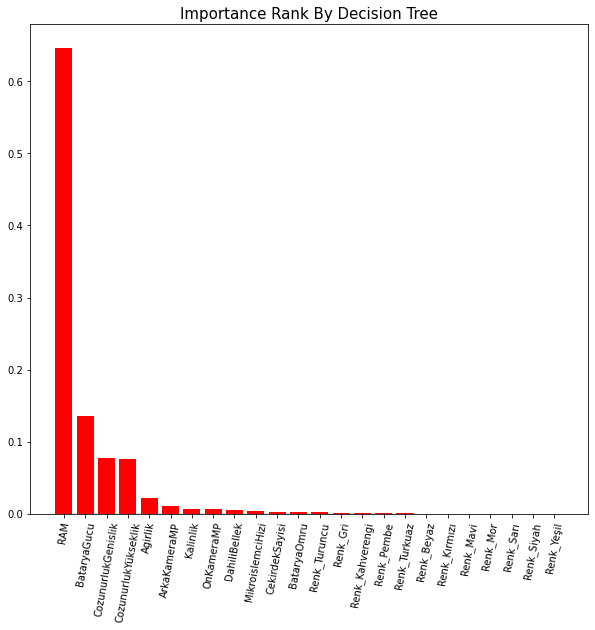

In [113]:
ranking = cart.feature_importances_
features = np.argsort(ranking)[::-1][:36]
columns = X.columns

plt.figure(figsize = (10, 9))
plt.title("Importance Rank By Decision Tree", y = 1, size = 15)
plt.bar(range(len(features)), ranking[features], color="red")
plt.xticks(range(len(features)), columns[features], rotation = 80)
plt.show()

**KNN (K- En Yakın Komşu) Sınıflandırma Algoritması**
1. Tüm kayıtlar n boyutlu bir uzay üzerinde temsil edilir.
2. Yeni bir örnek geldiği anda eğitim veri kümesine bakılarak sınıflandırma işlemi gerçekleştirilir.
3. Yeni gelen örneğin vektör değerleri ile uzaydaki tüm kayıtların (veri kümesi) vektör değerleri karşılaştırılır.


In [114]:
Knn = KNeighborsClassifier() 
Knn_model = Knn.fit(X_train, Y_train) 
#Yine aynı eğitim verileri üzerinden devam ediyoruz.
#KNeighborsClassifier adlı sınıftan Knn nesnesi oluşturup modeli eğitiyoruz.

In [115]:
Y_pred = Knn_model.predict(X)
#Model tahminde bulunuyor.

In [116]:
accuracy_score(Y, Y_pred)
#Tahminlere göre doğruluk skoru.

0.952

In [117]:
con_matrix = confusion_matrix(Y, Y_pred)
print(con_matrix)
#Karmaşıklık matrisi.

[[456  19  25   0]
 [ 15 485   0   0]
 [ 10   0 476  14]
 [  0   0  13 487]]


In [118]:
cross_val_score(cart_model, X, Y, cv = 15)
#Modele farklı gözlemler verip tekrardan skorunu inceleyelim.

array([0.82835821, 0.87313433, 0.84328358, 0.78358209, 0.8358209 ,
       0.80451128, 0.85714286, 0.87218045, 0.85714286, 0.87969925,
       0.82706767, 0.83458647, 0.86466165, 0.82706767, 0.90225564])

In [119]:
cross_val_score(cart_model, X, Y, cv = 15).mean()
#15 skorun ortalamsı.

0.8460329929300863

In [120]:
print(classification_report(Y, Y_pred))
#Sınıflandırma raporu.

              precision    recall  f1-score   support

      Normal       0.95      0.91      0.93       500
      Pahalı       0.96      0.97      0.97       500
        Ucuz       0.93      0.95      0.94       500
    Çok Ucuz       0.97      0.97      0.97       500

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



> Komşu sayı burada kritik ve 2’den 50’ye kadar olan her sayıyı komşu sayısı olarak deneyerek kaydetmemiz isteniyor.  

In [121]:
Knn_params = {"n_neighbors": np.arange(2,50)}
#Parametre optimizasyonu ile tekrardan KNN kuruyoruz.

In [122]:
Knn = KNeighborsClassifier()
Knn_cv = GridSearchCV(Knn, Knn_params, cv = 3)
Knn_cv.fit(X_train, Y_train)
#Eğitimi gerçekleştiriyoruz.

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [123]:
print("Best Score: " + str(Knn_cv.best_score_))
print("Best Parameters: " + str(Knn_cv.best_params_))

Best Score: 0.933531096860504
Best Parameters: {'n_neighbors': 13}


In [124]:
Knn = KNeighborsClassifier(13)
Knn_tuned = Knn.fit(X_train, Y_train)
Y_pred = Knn_tuned.predict(X_test)
#X_test için tahmin yapılıp Y_pred'de tutuluyor yine.

In [125]:
accuracy_score(Y_test, Y_pred)

0.93

> Komşu sayısının değişimi ile modelin skorunun da değişeceğini öngörülüyor, her komşu sayısına tekabül eden model skorunu bir plot çizdirerek göstermemiz isteniyor.

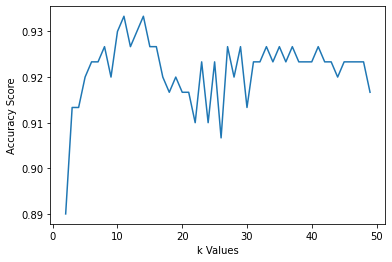

In [126]:
score_list = [] 

for each in range(2,50):
    Knn_new = KNeighborsClassifier(n_neighbors = each)
    Knn_new.fit(X_train, Y_train)
    score_list.append(Knn_new.score(X_test, Y_test))

plt.plot(range(2,50),score_list)
plt.xlabel("k Values")
plt.ylabel("Accuracy Score")
plt.show()